#### Loading Dependencies, Data, and Basic Data Exploration 

In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#import hvplot.pandas
import seaborn as sns
#from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
market_data_df.shape

(41, 7)

In [6]:
mkt_data_transcbd_df = market_data_df.describe().T
round(mkt_data_transcbd_df,2)

,count,mean,std,min,25%,50%,75%,max
price_change_percentage_24h,41.0,-0.27,2.69,-13.53,-0.61,-0.06,0.61,4.84
price_change_percentage_7d,41.0,4.50,6.38,-6.09,0.05,3.30,7.60,20.69
price_change_percentage_14d,41.0,0.19,8.38,-18.16,-5.03,0.11,5.51,24.24
price_change_percentage_30d,41.0,1.55,26.34,-34.71,-10.44,-0.04,4.58,140.80
price_change_percentage_60d,41.0,-0.09,47.37,-44.82,-25.91,-7.54,0.66,223.06
price_change_percentage_200d,41.0,236.54,435.23,-0.39,21.66,83.91,216.18,2227.93
price_change_percentage_1y,41.0,347.67,1247.84,-17.57,0.41,69.69,168.37,7852.09


In [7]:
market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [8]:
market_data_df.nunique()

price_change_percentage_24h     41
price_change_percentage_7d      41
price_change_percentage_14d     41
price_change_percentage_30d     41
price_change_percentage_60d     41
price_change_percentage_200d    41
price_change_percentage_1y      41
dtype: int64

### Prepare the Data

In [9]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

scaler = StandardScaler()
scaler = scaler.fit_transform(market_data_df)

In [10]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaler, columns = market_data_df.columns) 

# Copy the crypto names from the original data
scaled_df["coin_id"]= market_data_df.index

# Set the coinid column as index
scaled_df = scaled_df.set_index('coin_id')

# Display sample data
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [11]:
scaled_df.shape

(41, 7)

In [12]:
scaled_df.array = scaled_df.values

### Find the Best Value for k Using the Original Scaled DataFrame.

In [13]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_list = list(range(1,11)) 

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_list:
    crypto_model = KMeans(n_clusters = k, n_init ='auto', random_state=1 )
    crypto_model.fit(scaled_df)
    inertia.append(crypto_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_curve = {"k": k_list, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_curve) 

# Display the DataFrame
elbow_df

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


In [14]:
round(elbow_df,2).T

,0,1,2,3,4,5,6,7,8,9
k,1.0,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00
inertia,287.0,212.12,165.14,79.02,66.41,61.63,46.07,43.39,32.91,30.47


In [15]:
print(k_list)
print(inertia)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[287.0, 212.12334207486256, 165.1367523344681, 79.02243535120975, 66.41305075939437, 61.634088110682214, 46.074467441030215, 43.39269411734827, 32.913222659715245, 30.46911129327035]


In [16]:
# Determine the rate of decrease between each k value using the ELBOW CURVE. 
k = elbow_curve["k"]
inertia = elbow_curve["inertia"]
for i in range(1, len(k)):
    percentage_change = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    #print(f"Percentage change k={k[i-1]} to k={k[i]}: {percentage_change:.2f}%")
    print(f"Percentage change k={k[i-1]} to k={k[i]}: {percentage_change:.0f}")


Percentage change k=1 to k=2: 26
Percentage change k=2 to k=3: 22
Percentage change k=3 to k=4: 52
Percentage change k=4 to k=5: 16
Percentage change k=5 to k=6: 7
Percentage change k=6 to k=7: 25
Percentage change k=7 to k=8: 6
Percentage change k=8 to k=9: 24
Percentage change k=9 to k=10: 7


<Axes: title={'center': 'Finding K-Value for Crypto Clustering'}, xlabel='k'>

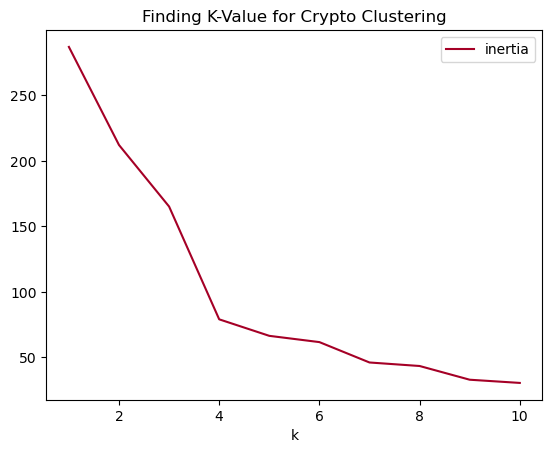

In [17]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot(x='k', y='inertia', cmap="RdYlGn",
title ='Finding K-Value for Crypto Clustering')
#style ="fivethirtyeight")


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** According to the chart, the k-value is 4. This is determined by the value of x at which the descending line graph has the shapest turn as x increases, after which the rate of change slowed down significantly.

##### **Intra Cluster Exploration with Silhouette:** how similar an object is to its own cluster compared to other clusters.

In [18]:
scaled_df.array = scaled_df.values
scaled_array_df = scaled_df.array.reshape(-1, 1)
scaled_array_df

array([[ 5.08529366e-01],
       [ 4.93193071e-01],
       [ 7.72200433e-01],
       [ 2.35459633e-01],
       [-6.74950963e-02],
       [-3.55953481e-01],
       [-2.51636882e-01],
       [ 1.85445894e-01],
       [ 9.34445040e-01],
       [ 5.58692121e-01],
       [-5.43409317e-02],
       [-2.73482725e-01],
       [-1.15759474e-01],
       [-1.99352110e-01],
       [ 2.17739616e-02],
       [-7.06336853e-01],
       [-2.16804207e-02],
       [-6.10301536e-02],
       [ 8.00452481e-03],
       [-5.50246924e-01],
       [-2.82060506e-01],
       [-4.07643829e-02],
       [-8.10928066e-01],
       [ 2.49457974e-01],
       [-5.03879651e-02],
       [-3.73164019e-01],
       [-4.58258816e-01],
       [-2.95546142e-01],
       [ 1.19303608e+00],
       [ 2.00095907e+00],
       [ 1.76061001e+00],
       [ 5.45842065e-01],
       [-2.91202870e-01],
       [-4.99847761e-01],
       [-2.70316950e-01],
       [ 8.91870708e-01],
       [ 1.32729453e+00],
       [ 8.00214184e-01],
       [-5.7

In [19]:
scaled_array_df.dtype

dtype('float64')

In [20]:
# reshaping the data to 2D Array
X = scaled_df.values  # Extract the values from the DataFrame
scaled_df_reshaped = X.reshape(-1, scaled_df.shape[1])
scaled_df_reshaped 

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [21]:
# scaled_df_reshaped.dtype

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [22]:
# Initialize the K-Means model using the best value for k. (where k = 4 )
crypto_model = KMeans(n_clusters=4, n_init='auto', random_state = 1)

In [23]:
# Fit the K-Means model using the scaled data
crypto_model.fit(scaled_df)

KMeans(n_clusters=4, random_state=1)

In [24]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters= crypto_model.predict(scaled_df)
crypto_clusters
# View the resulting array of cluster values.

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [25]:
# Create a copy of the DataFrame
cryptos_predictions_df = market_data_df.copy()

In [26]:
# Add a new column to the DataFrame with the predicted clusters
cryptos_predictions_df['CryptoPred'] = crypto_clusters
# Display sample data

In [27]:
cryptos_predictions_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,CryptoPred
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


In [28]:
cryptos_predictions_df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'CryptoPred'],
      dtype='object')

In [29]:
cryptos_predictions_df.shape

(41, 8)

<Axes: title={'center': 'Scatter Plot of Price Change Percent 24h vs 7d'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

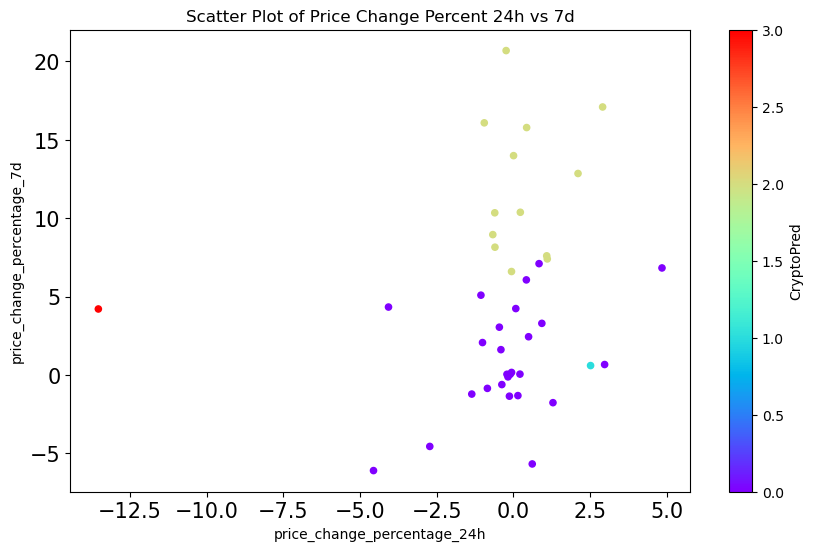

In [30]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

cryptos_predictions_df.plot.scatter(
    figsize=(10,6), #fontsize=14,
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    c="CryptoPred",
    title ='Scatter Plot of Price Change Percent 24h vs 7d', #)# cmap="RlYlGn")
    fontsize = 15,
    colormap = "rainbow")
    #colormap='winter')

### Optimize Clusters with Principal Component Analysis.

In [31]:
# Create a PCA model instance and set `n_components=3`.

from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [32]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
cryptos_pca = pca.fit_transform(scaled_df)

# Review the first 5 rows of list data
cryptos_pca


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527],
       [-0.51653377,  1.38837748,  0.80407131],
       [-0.45071134,  0.51769912,  2.84614316],
       [-0.34559977,  0.72943939,  1.47801284],
       [-0.64946792,  0.43216514,  0.60030286],
       [-0.75901394, -0.20119979, -0.21765292],
       [-0.24819846, -1.37625159, -1.46202571],
       [-0.43840762, -0.17533654, -0.6633884 ],
       [-0.69342533, -0.47381462, -0.52759693],
       [ 0.06049915,  2.90940385,  1.49857131],
       [-0.39335243, -0.10819197, -0.01275608],
       [-0.79617564, -0.49440875,  1.08281169],
       [ 0.06407452, -1.26982514, -1.09882928],
       [-0.48901506, -0.73271912, -0.06254323],
       [-0.3062723 ,  0.70341515,  1.71422359],
       [-0.51352775, -0.14280239, -0.65656583],
       [-0.36212044, -0.98691441, -0.728

In [33]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [34]:
round(sum(pca.explained_variance_ratio_)*100,2)

89.5

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total expalined variance of the three principal components = 0.8950 or **89.50%** 

### **PCA DataFrame:** Creating PCA DataFrame...

In [35]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# Creating a DataFrame with the PCA data

df_cryptos_pca = pd.DataFrame(cryptos_pca, columns=["PCA1", "PCA2", "PCA3"])

# Copy the crypto names from the original data
df_cryptos_pca["coin_id"] = market_data_df.index

# Set the coinid column as index
cryptos_pca_df = df_cryptos_pca.set_index("coin_id")

# Display sample data
cryptos_pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [36]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
#k_list_pca = list(range(1,11)) 
k_list = list(range(1,11)) 
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_list:
    pca_model = KMeans(n_clusters = k, n_init ='auto', random_state=1 )
    pca_model.fit(cryptos_pca_df)
    inertia.append(pca_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
pca_elbow_curve = {"k": k_list, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_df = pd.DataFrame(pca_elbow_curve) 

# Display the DataFrame
pca_elbow_df

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


In [37]:
round(pca_elbow_df,2).T

,0,1,2,3,4,5,6,7,8,9
k,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00
inertia,256.87,182.34,135.44,49.67,38.67,34.51,23.73,18.57,15.57,11.41


In [38]:
print(k_list)
print(inertia)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[256.87408556789234, 182.33953007775642, 135.44240762454206, 49.665496651797355, 38.67258217591795, 34.507576537581535, 23.72836478127476, 18.574523440183192, 15.57267221043334, 11.40766657209692]


In [39]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Determine the rate of decrease between each k value using the ELBOW CURVE. 
k = pca_elbow_curve["k"]
inertia = pca_elbow_curve["inertia"]
for i in range(1, len(k)):
    pca_percentage_change = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage change k={k[i-1]} to k={k[i]}: {pca_percentage_change:.2f}%")

    #print(f"Percentage change k={k[i-1]} to k={k[i]}: {percentage_change:.0f}")
    #print(f"{percentage_change[1]}:.0f")


Percentage change k=1 to k=2: 29.02%
Percentage change k=2 to k=3: 25.72%
Percentage change k=3 to k=4: 63.33%
Percentage change k=4 to k=5: 22.13%
Percentage change k=5 to k=6: 10.77%
Percentage change k=6 to k=7: 31.24%
Percentage change k=7 to k=8: 21.72%
Percentage change k=8 to k=9: 16.16%
Percentage change k=9 to k=10: 26.75%


<Axes: title={'center': 'Finding K-Value for Crypto Clustering'}, xlabel='k'>

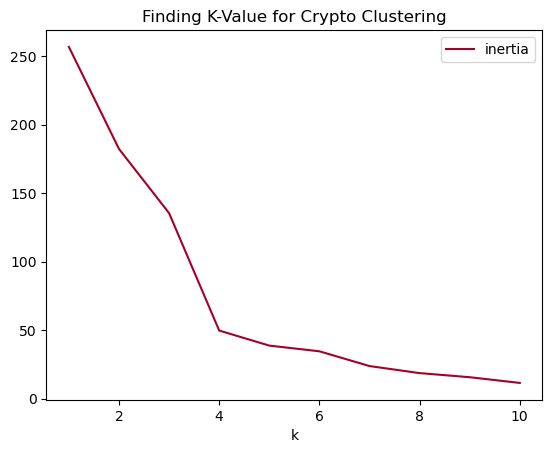

In [40]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
pca_elbow_df.plot(x='k', y='inertia', cmap="RdYlGn",
title ='Finding K-Value for Crypto Clustering')
#style ="fivethirtyeight")

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for 'k' when using PCA data is still **4,** see graph above

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No!. it is thesame as the 'k' vaue for the orogimal data

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [41]:
# Initialize the K-Means model using the best value for k (n_clusters value)
pca_crypto_model = KMeans(n_clusters=4, n_init='auto', random_state = 1)

In [42]:
# Fit the K-Means model using the PCA data

pca_crypto_model.fit(cryptos_pca_df)

KMeans(n_clusters=4, random_state=1)

In [43]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_crypto_clusters = pca_crypto_model.predict(cryptos_pca_df)

# Print the resulting array of cluster values.
pca_crypto_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [44]:
# Create a copy of the DataFrame with the PCA data

df_pca_crypto_predictions = cryptos_pca_df.copy()
# Add a new column to the DataFrame with the predicted clusters
df_pca_crypto_predictions["Pca_Clusters"] = pca_crypto_clusters

# Display sample data
df_pca_crypto_predictions.head()

,PCA1,PCA2,PCA3,Pca_Clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


<Axes: title={'center': 'Scatter Plot of PCA Values'}, xlabel='PCA1', ylabel='PCA2'>

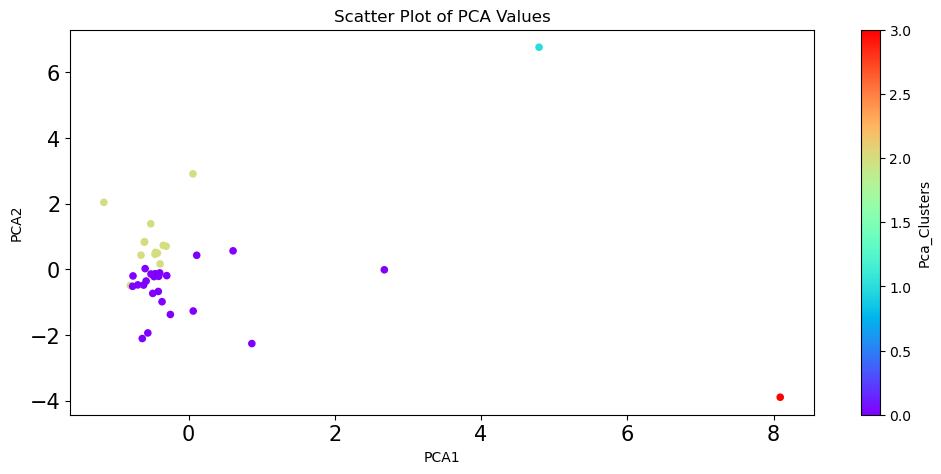

In [45]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
df_pca_crypto_predictions.plot.scatter( 
    figsize=(12,5),
    x="PCA1",
    y="PCA2",
    #z="PCA3",
    c="Pca_Clusters",
    title ='Scatter Plot of PCA Values', #)# cmap="RlYlGn")
    fontsize = 15,
    colormap = "rainbow")
   

In [48]:
# df_pca_crypto_predictions.hvplot.scatter(
#     #figsize=(8,5),
#     x="PCA1",
#     y="PCA2",
#     #z="PCA3",
#     c="Pca_Clusters",
#     title ='Scatter HvPlot of PCA Values', #)# cmap="RlYlGn")
#     fontsize = 15,
#     colormap = "rainbow")

### Determine the Weights of Each Feature on each Principal Component

In [ ]:
# Use the columns from the original scaled DataFrame as the index.
#pca_component_weights = pd.DataFrame(pca.components_.T, columns = ['PCA1', 'PCA2'], index = df_pca_crypto_predictions.columns)
pca_component_weights = pd.DataFrame(
    pca.components_.T, 
    columns = ['PCA1', 'PCA2','PCA3'], 
    index = scaled_df.columns)
pca_component_weights
#

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answers:**

    * **Positive influence:** "price_change_percentage_200d" and "price_change_percentage_1y" has the most impact on PCA1. while "price_change_percentage_30d" and price_change_percentage_14d have the most positive impact on PCA2. price_change_percentage_7d has the largest on PCA3, more than 2x the runner up.

    * **Negative inluence** "price_change_percentage_24h" has the most negative influence on PCA1 
    

#### **Extra Analysis:** PCAs Weights, Cryptos Predictions Correlations

In [ ]:
#df_pca_crypto_predictions = df_pca_crypto_predictions.corr()
pca_components_weights = pca_component_weights.corr()
# Define a function to apply colors based on values
def color_negative_red(val):
    color = 'red' if val < 0.0000 else 'lime'
    return 'color: %s' % color

# Display the DataFrame with color-coded cells
pca_comp_weight_styled_df = pca_components_weights.style.map(color_negative_red)
pca_comp_weight_styled_df

,PCA1,PCA2,PCA3
PCA1,1.000000,-0.554626,-0.116993
PCA2,-0.554626,1.000000,-0.280715
PCA3,-0.116993,-0.280715,1.000000


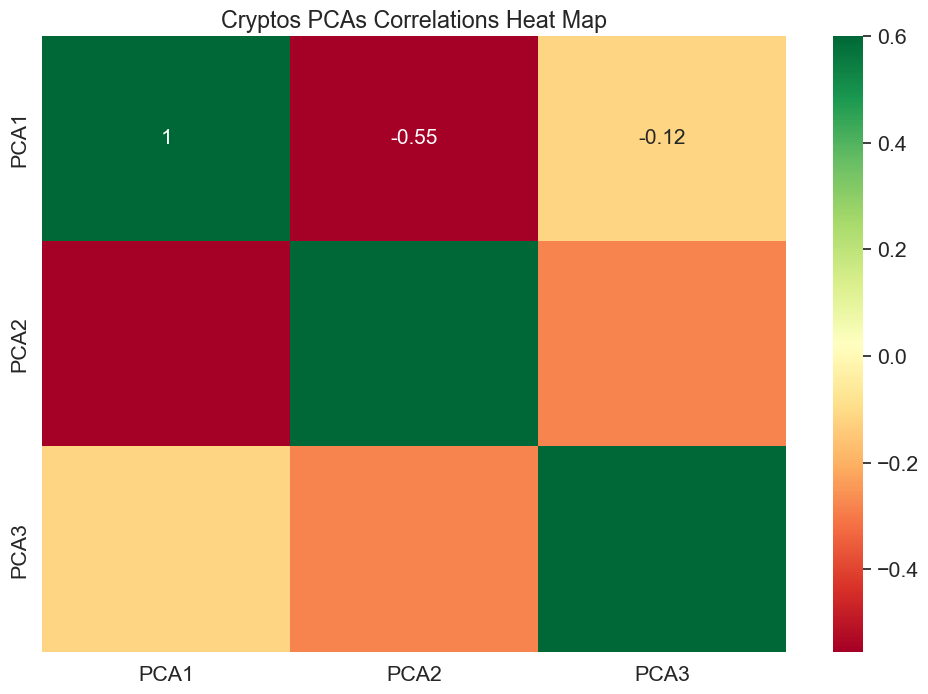

In [ ]:
# Heat Map for crypto Predictions PCAs
plt.figure(figsize = (12, 8))
plt.title('Cryptos PCAs Correlations Heat Map')
sns.set(font_scale = 1.4)
sns.heatmap(pca_component_weights.corr(), cmap="RdYlGn", annot=True, annot_kws={"size": 15}, vmax=0.60)
plt.show()

##### **Observation:** PCA3 seems to have the smoothest relationship or correlation with PCA1 and PCA2 without a deep negative correlation (red color).

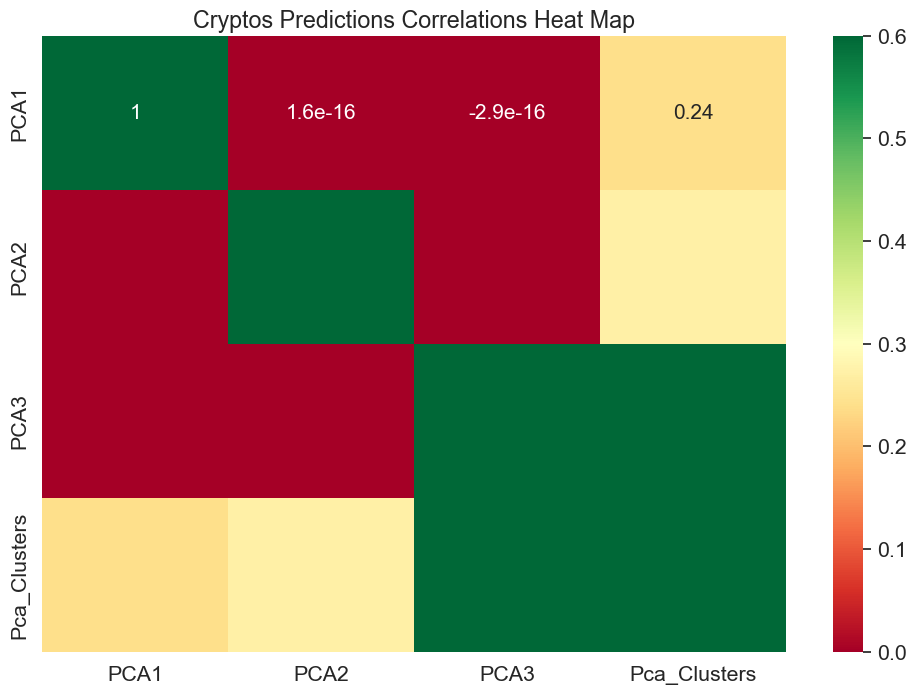

In [ ]:
# Heat Map for crypto PCAs with PCA Clusters
plt.figure(figsize = (12, 8))
plt.title('Cryptos Predictions Correlations Heat Map')
sns.set(font_scale = 1.4)
sns.heatmap(df_pca_crypto_predictions.corr(), cmap="RdYlGn", annot=True, annot_kws={"size": 15}, vmax=0.60)
plt.show()

##### **Observations:** PCA3 and the PCA Clusters seems to be positively correlated with each other based on the dark green shaping in both PCA3 and Pca Clusters at the bottom right corner of the heat map.